In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

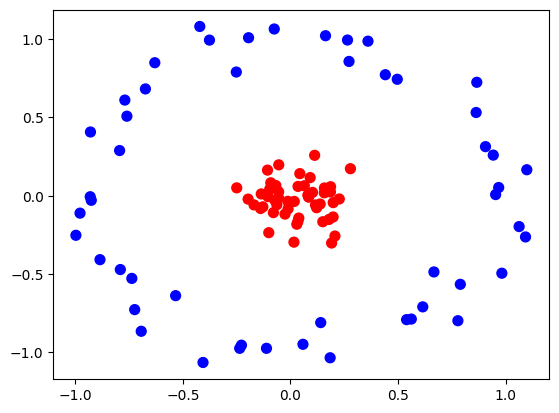

In [164]:
from sklearn.datasets._samples_generator import make_circles

X,y=make_circles(100,factor=.1,noise=.1)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="bwr")

In [165]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [166]:
model=SVC(kernel="linear")

model.fit(X_train,y_train.ravel())
y_pred=model.predict(X_test)

In [167]:
y_train

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [168]:
y_train.ravel()

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [169]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.65

<Axes: >

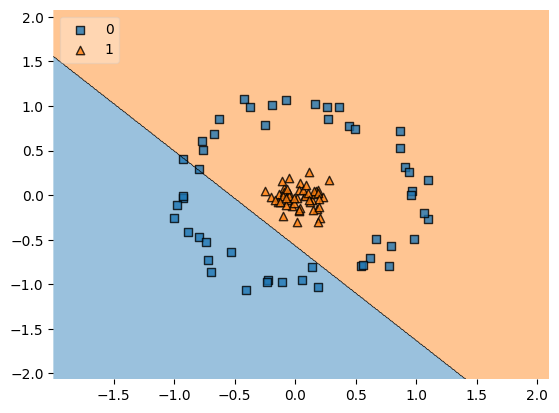

In [170]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=model,legend=2)

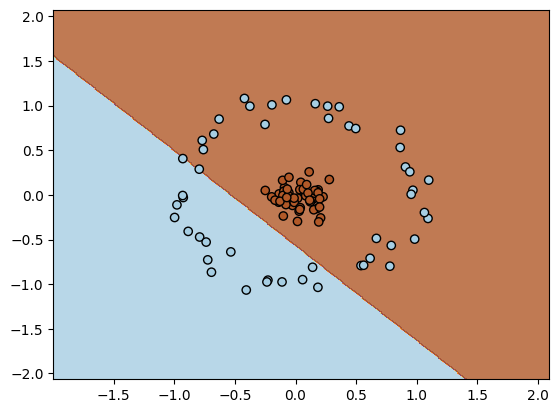

In [171]:
x_min,x_max=X[:,0].min() - 1,X[:,0].max() +1
y_min,y_max=X[:,1].min() - 1,X[:,1].max() +1

xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
Z =model.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,alpha=0.8,cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired,edgecolors="k")

In [172]:
def plot_decision(X,y,classifier):
    x_min,x_max=X[:,0].min() - 1,X[:,0].max() +1
    y_min,y_max=X[:,1].min() - 1,X[:,1].max() +1

    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
    Z =classifier.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,alpha=0.8,cmap=plt.cm.Paired)
    plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired,edgecolors="k")
        

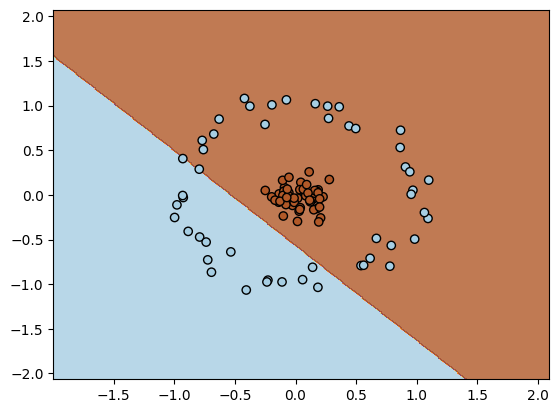

In [173]:
plot_decision(X,y,model)

In [174]:
def plot_3d_plot(X,y):
    r=np.exp(-(X**2).sum(1))
    ax=plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=100,cmap="bwr")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    return ax

<Axes3D: xlabel='x1', ylabel='x2', zlabel='y'>

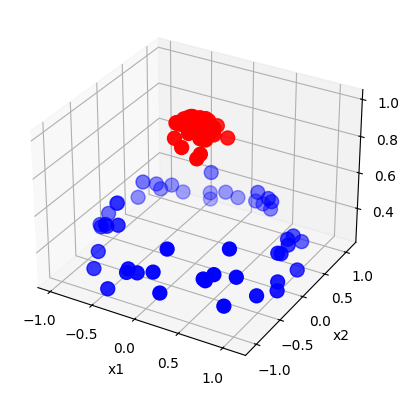

In [175]:
plot_3d_plot(X,y)

In [176]:
r=np.exp(-(X**2).sum(1))

In [177]:
r

array([0.94643895, 0.3478832 , 0.50582294, 0.98165858, 0.97835636,
       0.96262271, 0.42858573, 0.99272994, 0.9849518 , 0.96265676,
       0.44510476, 0.92381931, 0.39857515, 0.95102584, 0.28862012,
       0.34892127, 0.4241581 , 0.98905499, 0.98569755, 0.43943243,
       0.97516115, 0.26040087, 0.993471  , 0.96160003, 0.40507599,
       0.99835561, 0.97954972, 0.89669355, 0.97448634, 0.89810838,
       0.94939207, 0.39088793, 0.38177991, 0.32672357, 0.50059722,
       0.3427548 , 0.38668855, 0.97842854, 0.93721875, 0.36589985,
       0.98220712, 0.48992521, 0.99280692, 0.98914349, 0.99524055,
       0.32002916, 0.96844255, 0.28289463, 0.33154533, 0.99637142,
       0.99293249, 0.95901493, 0.27949102, 0.29221656, 0.32330066,
       0.99676091, 0.97871147, 0.38212673, 0.29112077, 0.50848778,
       0.96861792, 0.99857274, 0.99184812, 0.97293911, 0.97846687,
       0.99390638, 0.29809705, 0.39878156, 0.96553399, 0.98907517,
       0.93627355, 0.43363917, 0.45317472, 0.91556399, 0.41396

In [178]:
(X**2).sum(1)

array([0.05504881, 1.05588848, 0.6815686 , 0.01851171, 0.0218813 ,
       0.03809373, 0.8472645 , 0.00729662, 0.01516257, 0.03805836,
       0.80944561, 0.07923877, 0.91985921, 0.05021405, 1.24264392,
       1.05290898, 0.85764901, 0.01100534, 0.01440572, 0.82227132,
       0.02515254, 1.34553302, 0.00655041, 0.03915668, 0.9036806 ,
       0.00164574, 0.02066229, 0.10904112, 0.02584478, 0.10746453,
       0.05193342, 0.93933439, 0.96291099, 1.11864082, 0.69195345,
       1.07073997, 0.95013569, 0.02180752, 0.06483857, 1.00539562,
       0.01795308, 0.71350252, 0.00721907, 0.01091588, 0.00477081,
       1.13934317, 0.03206611, 1.26268079, 1.10399075, 0.00363518,
       0.0070926 , 0.04184864, 1.27478511, 1.23026011, 1.12917256,
       0.00324434, 0.02151839, 0.96200297, 1.2340171 , 0.6763141 ,
       0.03188505, 0.00142828, 0.00818529, 0.02743377, 0.02176835,
       0.00611226, 1.21033617, 0.91934149, 0.03507398, 0.01098495,
       0.06584759, 0.83554249, 0.79147754, 0.08821502, 0.88196

In [179]:
X**2

array([[3.20961572e-02, 2.29526550e-02],
       [3.78860927e-02, 1.01800239e+00],
       [4.44598928e-01, 2.36969670e-01],
       [1.83795627e-02, 1.32148330e-04],
       [1.90759735e-02, 2.80532577e-03],
       [3.48006405e-02, 3.29309313e-03],
       [6.24980135e-01, 2.22284360e-01],
       [3.99225149e-03, 3.30436821e-03],
       [8.35764878e-03, 6.80492234e-03],
       [1.13475916e-02, 2.67107661e-02],
       [7.41204834e-02, 7.35325125e-01],
       [1.26456063e-02, 6.65931683e-02],
       [8.21689256e-01, 9.81699576e-02],
       [2.26139099e-02, 2.76001361e-02],
       [6.05568216e-01, 6.37075704e-01],
       [5.23926459e-01, 5.28982522e-01],
       [8.56795607e-01, 8.53404620e-04],
       [9.29885857e-03, 1.70648403e-03],
       [6.34862839e-04, 1.37708532e-02],
       [5.43360179e-01, 2.78911145e-01],
       [2.48057829e-02, 3.46759814e-04],
       [1.77414600e-01, 1.16811842e+00],
       [6.53979180e-03, 1.06143105e-05],
       [3.86820556e-02, 4.74625133e-04],
       [3.391201

In [180]:
5.58275511e-03+3.50382067e-02

0.040620961809999995

In [182]:
rbf_classifier=SVC(kernel="rbf")
rbf_classifier.fit(X_train,y_train)
y_pred=rbf_classifier.predict(X_test)

In [183]:
accuracy_score(y_test,y_pred)

1.0

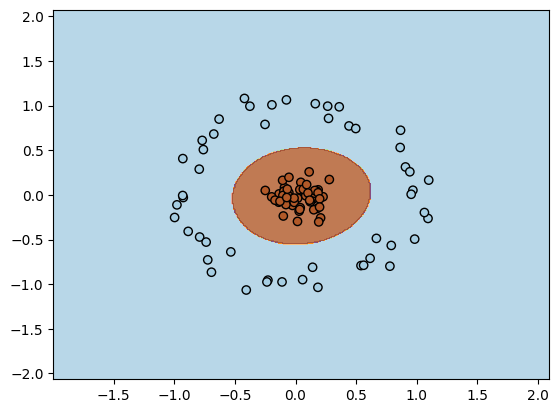

In [184]:
plot_decision(X,y,rbf_classifier)

<Axes: >

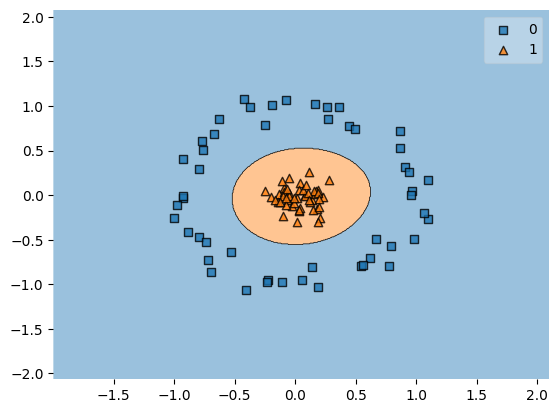

In [186]:
plot_decision_regions(X,y,clf=rbf_classifier)

## Kernel=Poly

In [203]:
poly_classifier=SVC(kernel="poly",degree=100)
poly_classifier.fit(X_train,y_train)
y_pred=poly_classifier.predict(X_test)

In [204]:
accuracy_score(y_test,y_pred)

0.9

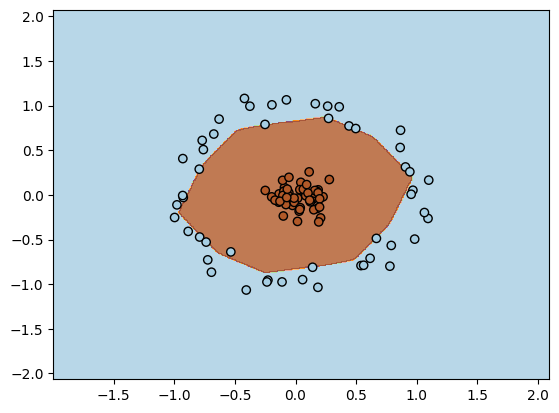

In [205]:
plot_decision(X,y,poly_classifier)